In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib import ticker
import random

torch.cuda.manual_seed(43)
torch.manual_seed(43)
random.seed(43)

# 定义VGG16网络
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [5]:
transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

trainset = torchvision.datasets.CIFAR10(root='../dataset/cifar10', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../dataset/cifar10', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


模型在训练cuda上训练


 10%|█         | 20/200 [12:03<1:48:31, 36.18s/it]

第20轮训练 ==> 训练损失:  0.00695 	 训练准确率:  85.43% 	  测试准确率:  79.93%


 20%|██        | 40/200 [24:04<1:37:03, 36.39s/it]

第40轮训练 ==> 训练损失:  0.00453 	 训练准确率:  94.85% 	  测试准确率:  84.75%


 30%|███       | 60/200 [36:09<1:24:16, 36.12s/it]

第60轮训练 ==> 训练损失:  0.00333 	 训练准确率:  97.23% 	  测试准确率:  85.33%


 40%|████      | 80/200 [48:14<1:12:25, 36.21s/it]

第80轮训练 ==> 训练损失:  0.00263 	 训练准确率:  97.28% 	  测试准确率:  85.27%


 50%|█████     | 100/200 [1:00:22<1:00:09, 36.10s/it]

第100轮训练 ==> 训练损失:  0.00217 	 训练准确率:  99.15% 	  测试准确率:  87.18%


 60%|██████    | 120/200 [1:12:27<48:14, 36.18s/it]  

第120轮训练 ==> 训练损失:  0.00186 	 训练准确率:  99.20% 	  测试准确率:  87.16%


 70%|███████   | 140/200 [1:24:28<36:04, 36.07s/it]

第140轮训练 ==> 训练损失:  0.00162 	 训练准确率:  99.06% 	  测试准确率:  86.68%


 80%|████████  | 160/200 [1:36:31<24:05, 36.13s/it]

第160轮训练 ==> 训练损失:  0.00145 	 训练准确率:  99.34% 	  测试准确率:  86.84%


 90%|█████████ | 180/200 [1:48:33<12:01, 36.10s/it]

第180轮训练 ==> 训练损失:  0.00130 	 训练准确率:  99.60% 	  测试准确率:  87.99%


100%|██████████| 200/200 [2:00:38<00:00, 36.19s/it]

第200轮训练 ==> 训练损失:  0.00119 	 训练准确率:  99.41% 	  测试准确率:  87.21%


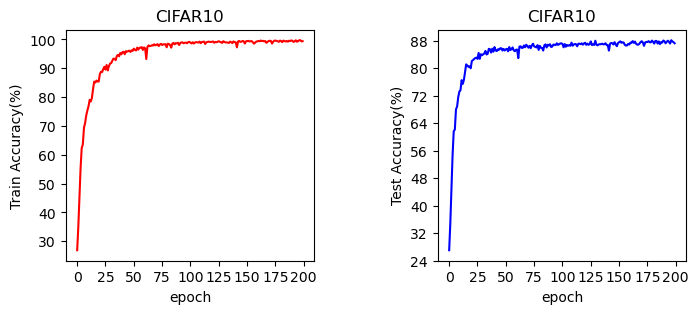

In [8]:
from tqdm import tqdm


device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"模型在训练{device}上训练")
net = VGG16().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

def test(data_iter):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(data_iter):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            total += targets.shape[0]
            correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()

    # print(f'Test Loss: {test_loss/len(testloader):.4f}, Test Accuracy: {100.*correct/total:.2f}%')

    return 100.*correct/total


def train(epoches):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    train_accuracy_array = []
    test_accuracy_array = []
    for epoch in tqdm(range(epoches)):
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            
            train_loss += loss.item()
            total += targets.shape[0]
            correct +=  torch.sum(torch.argmax(outputs, dim=1) == targets).item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_accuracy = test(trainloader)
        test_accuracy = test(testloader)

        train_accuracy_array.append(train_accuracy)
        test_accuracy_array.append(test_accuracy)

        if (epoch + 1) % 20 == 0:
            print(f"第{epoch + 1}轮训练 ==> 训练损失: {train_loss / total: .5f} \t 训练准确率: {train_accuracy: .2f}% \t  测试准确率: {test_accuracy: .2f}%")
        
    return train_accuracy_array, test_accuracy_array
        

train_accuracy_array, test_accuracy_array = train(200)

_, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].plot(range(len(train_accuracy_array)), train_accuracy_array, c='r') 
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("Train Accuracy(%)")
axes[0].set_title("CIFAR10")
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

axes[1].plot(range(len(test_accuracy_array)), test_accuracy_array, c='b')
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("Test Accuracy(%)")
axes[1].set_title("CIFAR10")
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.subplots_adjust(wspace=0.5)
plt.show()
